# Signal filtering

## Objectives

* Review Fourier transforms
* Filter signals

In [ ]:
# Optional
# %matplotlib notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Convolutions and Fourier transforms

Let's say you have a sample with N points over time T.

In [2]:
N = 1_000
T = 2*np.pi

t = np.linspace(0, T, N, endpoint=False)

Let's define a plotting function that shows the signal and it's Fourier transform. Unlike before, let's get the $x$-axis units right.

In [3]:
def plot_with_fft(t, signal):
    f = np.fft.rfft(signal)
    ft = np.fft.rfftfreq(len(t), t[1] - t[0])
    
    fig, axs = plt.subplots(1,2, figsize=(7,3))
    axs[0].plot(t,signal)
    axs[0].set_xlabel('t [s]')
    axs[1].plot(ft,np.abs(f), color='black')
    axs[1].set_xlabel('freq [Hz]')
    axs[1].set_yscale('log')
    plt.tight_layout()
    plt.show()

In [4]:
y = 1 / (1 - .9 * np.sin(t))
#y += np.random.rand(N)*2-1

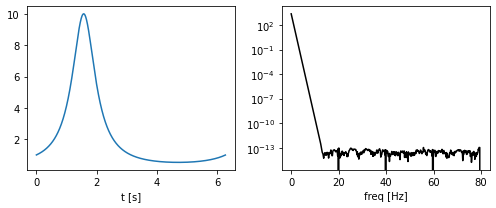

In [5]:
plot_with_fft(t, y)

## Convolution

$$
g(t) = \int^{+\infty}_{-\infty} f(\tau) \, h(t-\tau) \, d \tau
\equiv f(t) * h(t)
\tag{1}
$$

Autocorrelation is just the above equation with both $h(t)=f(t)$. (Assuming a real signal - otherwise correlation needs the complex conjugate of one of the functions.)

Now we compute the autocorrelation of the signal, and plot again. 

In [6]:
z = np.convolve(y, np.tile(y,2), 'valid')[:-1]
tz = np.linspace(-T/2, T/2, len(z))
print(len(z), z[0], z[-1])

1000 2294.1756791564476 2294.230701544344


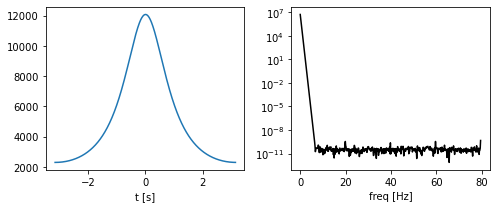

In [7]:
plot_with_fft(tz, z)

## The convolution theorem

A convolution in real space is a multiplication in Fourier space!

$$
g(t) = f(t) * h(t)
$$

$$
G(\omega) = \sqrt{2\pi} F(\omega) H(\omega)
$$

Note that the $\sqrt{2\pi}$ is from the definition we have of the FT. I believe numpy and most software put $2\pi$ in the iFT instead of splitting it up.

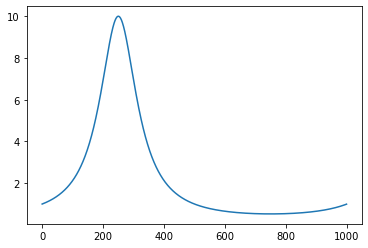

In [8]:
plt.figure()
plt.plot(y)
plt.show()

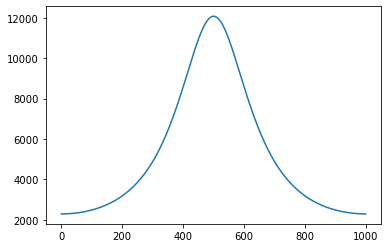

In [9]:
f = np.fft.rfft(y)
f**=2
yy = np.fft.irfft(f)

plt.figure()
plt.plot(yy)
plt.show()

### Filters

Now, let's define a filter $H(\omega)$. We can try physically inspired ones from RC circuits:

$$
H_\textrm{low}(\omega) =
  \frac{1}{1 + i \omega \tau_\mathrm{RC}}
$$

$$
H_\textrm{high}(\omega) =
  \frac{i \omega \tau_\mathrm{RC}}{1 + i \omega \tau_\mathrm{RC}}
$$

Or, we can build them:

$$
H(\omega) =
  \sum_{n=0}^{N} c_n e^{-i n \omega \tau}
$$

Let's make a noisy signal and try a filter. Let's start with a rectangular lowpass filter:

In [10]:
y = 1 / (1 - .9 * np.sin(t))
y += np.random.rand(N)*2-1
ft = np.fft.rfftfreq(len(t), t[1] - t[0])

In [11]:
f = np.fft.rfft(y)
f[ft > 6.5] = 0
yy = np.fft.irfft(f)

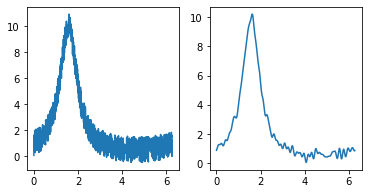

In [12]:
fig, axs = plt.subplots(1,2,figsize=(6,3))
axs[0].plot(t, y)
axs[1].plot(t, yy)
plt.show()

We can do this in the time domain with convolutions as well:

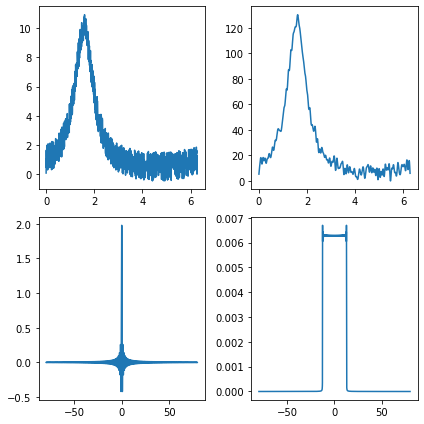

In [13]:
B = 1
ift = np.linspace(-N/T/2, N/T/2, len(y)*2)

H = 2*B * np.sinc(2*B*ift)
z = np.convolve(y, H, 'valid')[:-1]
i_H = np.abs(np.fft.ifft(H))


fig, axs = plt.subplots(2,2,figsize=(6,6))
axs[0,0].plot(t, y)
axs[0,1].plot(t, z)
axs[1,0].plot(ift, H)
axs[1,1].plot(ift, np.fft.fftshift(i_H))
plt.tight_layout()
plt.show()

See https://docs.scipy.org/doc/scipy/reference/signal.html

In [14]:
import scipy.signal as signal

Let's try a low-pass butterworth filter. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

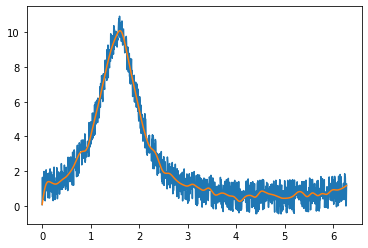

In [15]:
b, a = signal.butter(3, 0.05)
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, y, zi=zi*y[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
Y = signal.filtfilt(b, a, y)

plt.figure()
plt.plot(t,y)
plt.plot(t,Y)
plt.show()

### Aside: Plotting the wave packet in the book

In [16]:
x = np.linspace(0, T, N, endpoint=False)

In [17]:
k_0 = 10
σ_0 = 1

In [18]:
ψ = np.exp(-1/2 * ((x - 5)/(σ_0))**2 ) * np.exp(1j * k_0 * x)

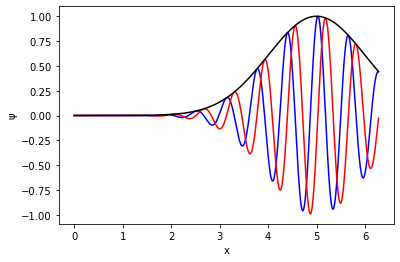

In [19]:
fig, ax = plt.subplots()
ax.plot(x, ψ.real, color='blue')
ax.plot(x, ψ.imag, color='red')
ax.plot(x, np.abs(ψ), color='black')
ax.set_xlabel('x')
ax.set_ylabel('ψ')
plt.show()

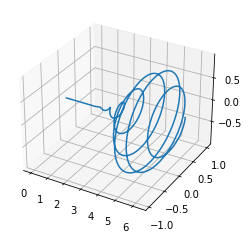

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t, ψ.real, ψ.imag)
plt.show()